# A notebook to check the stability of the strategies

In [42]:
import sympy as sym
import scipy as sp
import numpy as np

import imp
tools = imp.load_source('tools', '../tools.py')

sym.init_printing()

assert sym.__version__ == "1.0"
assert sp.__version__ == "0.19.0"
assert np.__version__ == "1.12.1"

In [43]:
#import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

# Stability of all selective

Two things are calculated here.The utility of being selective in a population 
of selective poarchers and the utility of being indiscriminating in the same population.
Thus,

- $u((1, 0), (1, 0))$
- $u((0, 1), (1, 0))$

In order for the strategy being `selective' to be stable $u((1, 0), (1, 0))$ must be greater than $u((0, 1), (1, 0))$.

Thus let

- $ \chi = (1, 0)$
- $s^* = (1, 0)$
- $s = (0, 1)$

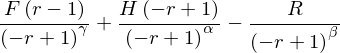

In [44]:
utility_s = tools.utility(1, 1)
utility_s

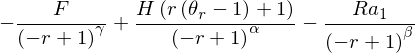

In [45]:
utility_i = tools.utility(0, 1)
utility_i

We have argued that $H(-r + 1)(-r + 1)^{-a}$ is greater than $H(r(\theta_r -1) + 1)(-r + 1)^{-a}$

In [46]:
r, theta_r = sym.symbols("r, theta_r", positive=True)

but $(-r + 1)$ is smaller than $r(\theta_r -1) + 1)$

In [47]:
lhs = -r + 1
rhs = (r * (theta_r - 1) + 1)

In [48]:
(lhs - rhs).simplify()

A Numerical example
-------------------

In [49]:
s, x, alpha, H, R, a1, beta, gamma, F = sym.symbols("s, x, alpha, H, R, a1, beta, gamma, F",
                                                    positive=True)

In [50]:
# some values for the parameters
gamma_num = 1
beta_num = .95
alpha_num = .95 
theta_r_num = .2  # Quantity of horn in devalued Rhino
F_num = 10
R_num = 1
a1_num = 7
H_num = 100

In [51]:
variables = {gamma: gamma_num, beta: beta_num, alpha: alpha_num, 
             theta_r:theta_r_num, F: F_num, R: R_num, a1: a1_num, H: H_num, r:.97}

In [52]:
utility_s.subs(variables)

In [53]:
utility_i.subs(variables)

In our numerical example let us identify the utility of all possible strategies, $s \in [0, 1]$ for the population
$\chi = (1, 0)$. Thus were in our world everyone is selective. What we expect in order for the strategy
$s = (1, 0)$ to be stable, thus being selective is stable, is that this strategy will have the highest utility

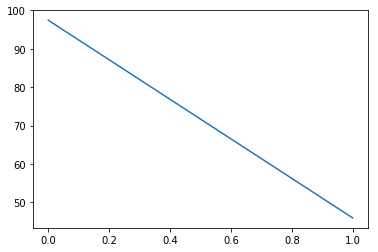

In [54]:
strategies = np.linspace(0, 1, 20)
utilities = [tools.utility(s, 1).subs(variables) for s in strategies]
plt.plot(strategies, utilities)

$s = (1, 0)$ is not stable.

General case
------------

In [55]:
delta = (utility_s - utility_i).simplify()
delta.subs({r:0})

In [56]:
sym.limit(delta, r, 1)

All selective is not stable.

# Stability of all indiscriminate

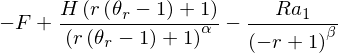

In [57]:
utility_i = tools.utility(0, 0)
utility_i

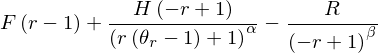

In [58]:
utility_s = tools.utility(1, 0)
utility_s

General case
------------

In [62]:
delta = (utility_i - utility_s).simplify()
delta.subs({r:0})

In [63]:
sym.limit(delta, r, 1)

A Numerical experiment
----------------------

In [66]:
utility_i.subs(variables)

In [67]:
utility_s.subs(variables)

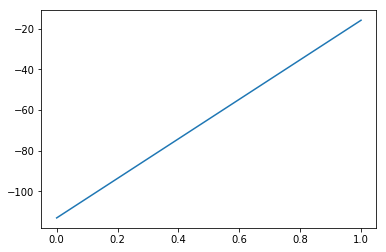

In [69]:
strategies = np.linspace(0, 1, 20)
utilities = [tools.utility(s, 0).subs(variables) for s in strategies]
plt.plot(strategies, utilities)

Thus $s=(1, 0)$ and $s=(0, 1)$ are not stable.